In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [38]:
#Load the Dataset
df = pd.read_csv('/content/car_purchasing.csv', encoding='latin-1')

#Exploring the Dataset




In [39]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [41]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [42]:
df.shape

(500, 9)

In [43]:
# Checking for duplicates
df.duplicated().sum()

0

In [44]:
# Checking for null values
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

<Axes: xlabel='credit card debt', ylabel='Count'>

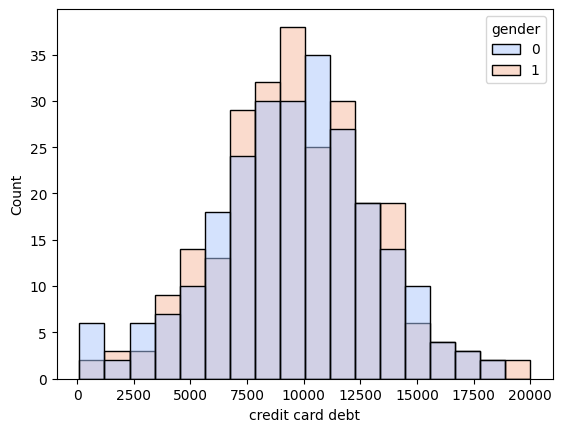

In [45]:
sns.histplot(data=df, x='credit card debt', hue='gender', palette='coolwarm')

<Axes: xlabel='annual Salary', ylabel='Count'>

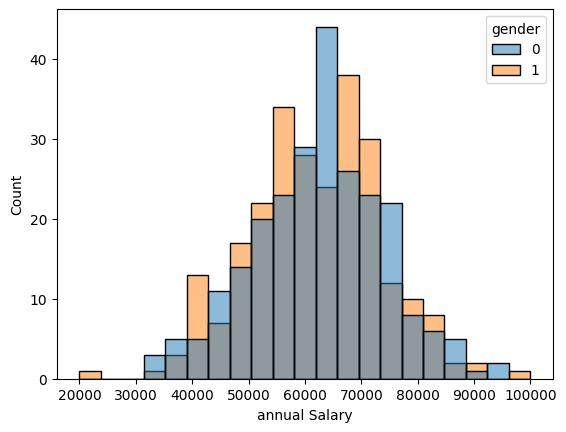

In [46]:
sns.histplot(data=df, x='annual Salary', hue='gender')

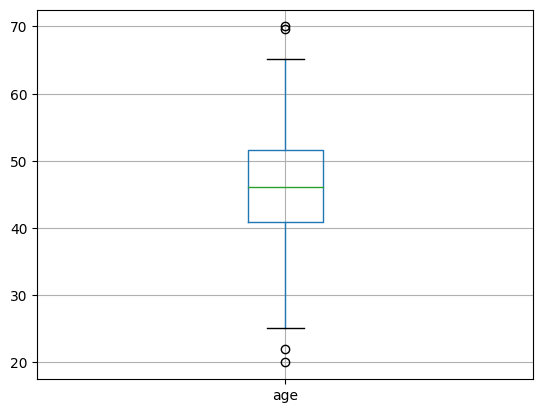

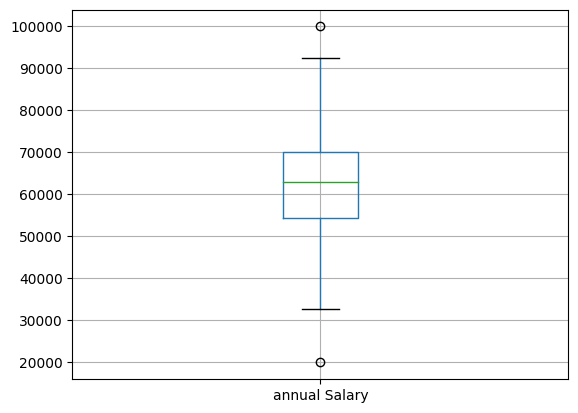

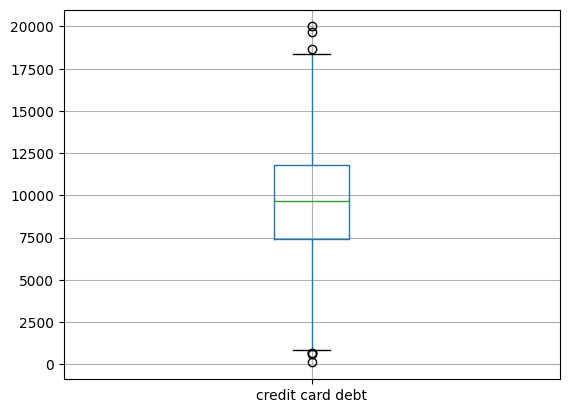

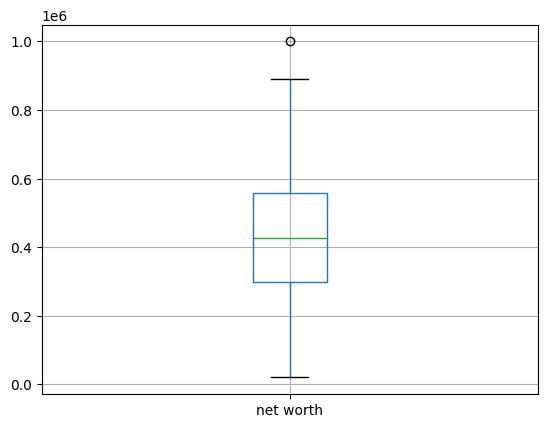

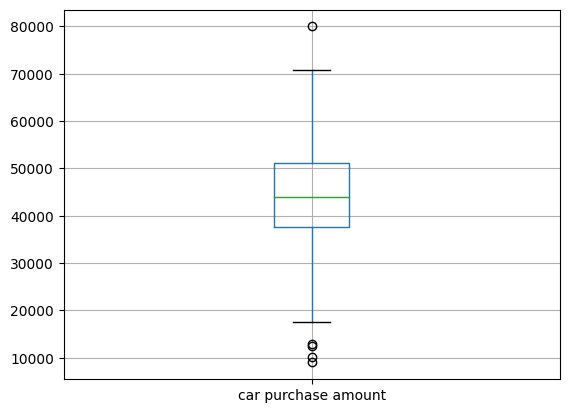

In [47]:
# checking for outliers
col = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
for m in col:
  plt.figure()
  df.boxplot(m)
  plt.show()

#Preparing the DataSet

In [48]:
# Feature Selection
# Deleting customer name column
df = df.drop(['customer name'], axis=1)

# Deleting customer e-mail column
df = df.drop(['customer e-mail'], axis=1)

In [49]:
# Convert categorical columns to numerical using LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['gender'] = le.fit_transform(df['gender'])

In [50]:
scaler = MinMaxScaler()
dff = scaler.fit_transform(df)

#Modeling

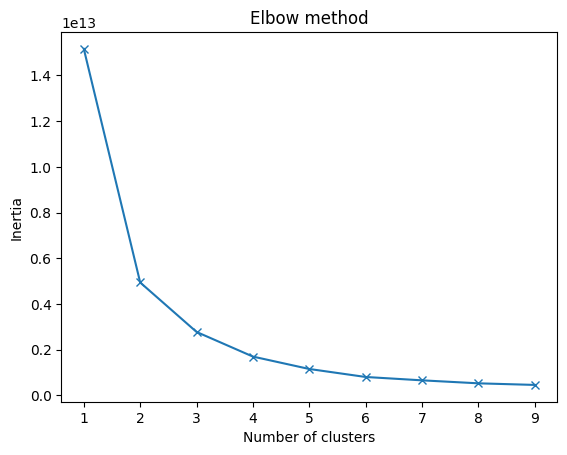

In [51]:
# Applying Elbow method to determine number of clusters
inertias = []
for i in range(1,10):
    km = KMeans(n_clusters=i, n_init = 20)
    km.fit(df)
    inertias.append(km.inertia_)

plt.plot(range(1,10), inertias, marker='x')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [52]:
#K-Means with 2 clusters
clustering_kmeans = KMeans(n_clusters=2, n_init = 20)
df['clusters'] = clustering_kmeans.fit_predict(df)

In [53]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,clusters
0,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,1
1,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,0
2,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,0
3,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,0
4,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,0


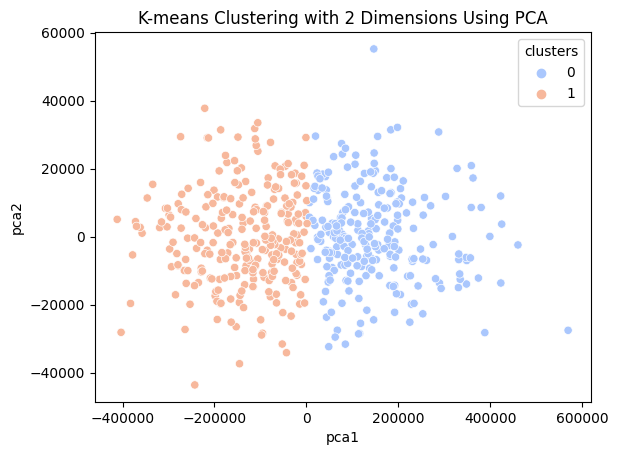

In [54]:
pcadata = PCA(n_components = 2).fit_transform(df)
newdf = pd.DataFrame(pcadata, columns = ['pca1', 'pca2'])
sns.scatterplot(x = "pca1", y = "pca2", hue=df['clusters'], data=newdf, palette='coolwarm')
plt.title('K-means Clustering with 2 Dimensions Using PCA')
plt.show()